# Урок 3. Логистическая регрессия. Log Loss

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-1">Логистическая регрессия</a></span></li><li><span><a href="#Логистическая-функция-потерь" data-toc-modified-id="Логистическая-функция-потерь-2">Логистическая функция потерь</a></span></li><li><span><a href="#Пример" data-toc-modified-id="Пример-3">Пример</a></span></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

### Логистическая регрессия

Обобщение линейной регрессии на задачу классификации.

<img src='img/algorithmes-de-classification-regression-logistique-9.jpg' width=400 align='left'> </img>

$\vec{y}=X\vec{w}$

Проблемы:  
1) Если предсказывать с помощью линейной регрессии, то могут появляться такие числа:   
np.dot(X, w) = [-12, 2, 1.5, 0.0005, 1000 ...]  
2) MSE, как функция потерь, не подходит.

p = [0, 1] - вероятность

$odds = \frac{p}{1 - p} = \frac{p_1}{p_0}$ - шансы

In [3]:
p = 0.1
p / (1 - p)

0.11111111111111112

In [4]:
p = 0.9
np.log(p / (1 - p))

2.1972245773362196

$$X\vec{w} = \ln\Big(\frac{\vec{p}}{1 - \vec{p}}\Big)$$
$$\exp(X\vec{w}) = \frac{\vec{p}}{1 - \vec{p}}$$
$$(1-\vec{p})\exp(X\vec{w}) = \vec{p}$$
$$\exp(X\vec{w})-\vec{p}\exp(X\vec{w}) = \vec{p}$$
$$\exp(X\vec{w})=\vec{p}(1+\exp(X\vec{w}))$$
$$\vec{p}=\frac{\exp{(X\vec{w})}}{1+\exp{(X\vec{w})}}$$
$$\vec{p}=\frac{1}{1+\exp{(-X\vec{w})}}=\sigma(X\vec {w})$$

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

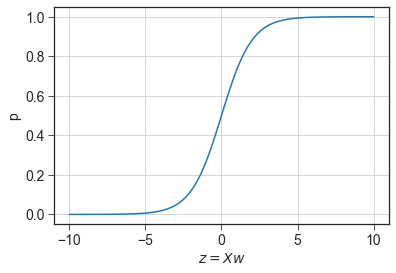

In [6]:
# сигмоида
z = np.linspace(-10, 10, 101)
probabilities = sigmoid(z)
plt.plot(z, probabilities)
plt.xlabel('$z=Xw$')
plt.ylabel('p')
plt.grid();

### Логистическая функция потерь 

Согласно распределению Бернулли, вероятность встретить объект с классом $y_i$ равна $p_i^{y_i}(1-p_i)^{1-y_i}$



$\text{Likelihood (правдоподобие):}$ 
$$L(X)=\prod_{i=1}^{n}{p_i^{y_i}(1-p_i)^{1-y_i}}\rightarrow max$$
$$\ln L(X)=\sum_{i=1}^{n}\big ({\ln{p_i}^{y_i}+\ln(1-p_i)^{1-y_i}}\big)$$
$$\ln (-L(X))=\sum_{i=1}^{n}\big({-y_i\ln{p_i}-(1-y_i)\ln(1-p_i)\big)}$$
$$LogLoss=\frac{1}{n}\sum_{i=1}^{n}\big({-y_i\ln{p_i}-(1-y_i)\ln(1-p_i)\big)}\rightarrow min$$

$y=0/1$ - истинный класс   
$p=[0,1]$ - ответ алгоритма


In [7]:
def calc_logloss(y, p):
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err

In [8]:
# Пример применения
y = 0
p = 0
calc_logloss(y, p)

C:\Users\vmakh\AppData\Local\Temp/ipykernel_17192/3822203847.py:2: RuntimeWarning: divide by zero encountered in log
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
C:\Users\vmakh\AppData\Local\Temp/ipykernel_17192/3822203847.py:2: RuntimeWarning: invalid value encountered in double_scalars
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))


nan

Найдем производную от функции потерь.

$${LogLoss}=\frac{1}{n}\sum_{i=1}^{n}\big({-y_i\ln{p_i}-(1-y_i)\ln(1-p_i)\big)}$$
Обозначим ${p_i}=\sigma({x_iw})=\frac{1}{1+\text{exp}(-x_iw)}$
$$\frac{\mathrm d}{\mathrm dw}{LogLoss}=\frac{\mathrm d}{\mathrm dw}\Big(-\frac{1}{n}\sum_{i=1}^{n}\big(y_i\ln\sigma(x_iw)+(1-y_i)\ln(1-\sigma(x_iw))\big)\Big)=$$
$$=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i\frac{\mathrm d}{\mathrm dw}\ln\sigma(x_iw)+(1-y_i)\frac{\mathrm d}{\mathrm dw}\ln(1-\sigma(x_iw))\big)=$$
$$=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i\frac{\frac{\mathrm d}{\mathrm dw}\sigma(x_iw)}{\sigma(x_iw)}+(1-y_i)\frac{\frac{\mathrm d}{\mathrm dw}(1-\sigma(x_iw))}{1-\sigma(x_iw)}\big)$$
Используя выражение для производной сигмоидной функции (вывод см. после ДЗ): $\frac{\mathrm d\sigma(z)}{\mathrm dz}=\sigma(z)(1-\sigma(z))$, получим:
$$\frac{\mathrm d}{\mathrm dw}{LogLoss}=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i\frac{\sigma(x_iw)(1-\sigma(x_iw))x_i}{\sigma(x_iw)}+(1-y_i)\frac{-\sigma(x_iw)(1-\sigma(x_iw))x_i}{1-\sigma(x_iw)}\big)=$$
$$=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i{(1-\sigma(x_iw))x_i}-(1-y_i){\sigma(x_iw)x_i}\big)=$$
$$=-\frac{1}{n}\sum_{i=1}^{n}\big(y_i-y_i\sigma(x_iw)-\sigma(x_iw)+y_i\sigma(x_iw)\big)x_i=$$
$$=\frac{1}{n}\sum_{i=1}^{n}\big(\sigma(x_iw)-y_i\big)x_i=\frac{1}{n}\sum_{i=1}^{n}\big(p_i-y_i\big)x_i$$
В векторной форме:
$$\frac{\mathrm d}{\mathrm d{w}}{LogLoss}=\frac{1}{n}({p}-{y})X$$
Тогда корректировка весов в методе градиентного спуска будет выполняться по формуле:
$${w}={w}-\eta \frac{1}{n}({p}-{y})X$$

### Пример

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]],  # возраст репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0]) # подходит или нет репетитор

X

array([[1.00e+00, 1.00e+00, 5.00e+02, 2.10e+01],
       [1.00e+00, 1.00e+00, 7.00e+02, 2.50e+01],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.70e+01],
       [1.00e+00, 1.00e+00, 6.00e+02, 2.00e+01],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.50e+01],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.80e+01],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.50e+01],
       [1.00e+00, 1.00e+01, 2.00e+03, 6.00e+01],
       [1.00e+00, 1.00e+00, 4.50e+02, 2.00e+01],
       [1.00e+00, 2.00e+00, 1.00e+03, 3.00e+01]])

In [10]:
def standardization(X):
    S = (X - X.mean(axis=0)) / X.std(axis=0)
    return S

X_st = X.copy()
X_st[:, 1:] = standardization(X[:, 1:])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.60595294],
       [ 1.        , -0.57142857, -0.56713087, -0.264571  ],
       [ 1.        , -0.21428571, -0.46401617, -0.09388003],
       [ 1.        , -0.57142857, -0.77336028, -0.69129842],
       [ 1.        ,  0.14285714,  0.97958969, -0.264571  ],
       [ 1.        , -0.92857143, -0.36090146, -0.86198939],
       [ 1.        ,  0.85714286,  1.08270439,  0.58888384],
       [ 1.        ,  2.64285714,  2.11385144,  2.72252095],
       [ 1.        , -0.57142857, -1.08270439, -0.69129842],
       [ 1.        , -0.21428571,  0.05155735,  0.16215642]])

In [11]:
# логистическая регрессия
def eval_LR_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        pred = sigmoid(z) # p [0, 1]
        w -= eta * (1/n * np.dot((pred - y), X))
        err = calc_logloss(y, sigmoid(np.dot(X, w)))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w

In [12]:
w = eval_LR_model(X_st, y, iterations=100, eta=0.1)

10 [ 0.36065583 -0.3972585   0.51937535  1.19161524] 0.972199021173242
20 [ 0.215788   -0.61251766  0.44159174  0.90102578] 0.8152129340815597
30 [ 0.08277136 -0.76559453  0.42551123  0.67107078] 0.7212678942568461
40 [-0.02507329 -0.85541749  0.46585326  0.50463174] 0.6722796074198796
50 [-0.10912684 -0.90576455  0.53830407  0.37884616] 0.6416699927595096
60 [-0.17469927 -0.93640342  0.62421319  0.27424279] 0.6181685428656378
70 [-0.22617113 -0.95733883  0.71436092  0.18090474] 0.5982903907109157
80 [-0.26681997 -0.97319728  0.80460517  0.09421158] 0.5807656397146188
90 [-0.29911987 -0.98614533  0.89312045  0.01196478] 0.5649873364632755
100 [-0.32495521 -0.99723356  0.97913034 -0.06693668] 0.5506011060815836


In [13]:
pred = sigmoid(np.dot(X_st, w))
print('prob =', pred.round(2))
print('true =', y)
print('pred =', np.where(pred > 0.5, 1, 0))

prob = [0.34 0.43 0.36 0.39 0.62 0.58 0.46 0.25 0.32 0.48]
true = [0 0 0 1 1 1 1 0 0 0]
pred = [0 0 0 0 1 1 0 0 0 0]


In [14]:
calc_logloss(y=0, p=0)

C:\Users\vmakh\AppData\Local\Temp/ipykernel_17192/3822203847.py:2: RuntimeWarning: divide by zero encountered in log
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
C:\Users\vmakh\AppData\Local\Temp/ipykernel_17192/3822203847.py:2: RuntimeWarning: invalid value encountered in double_scalars
  err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))


nan

### Домашние задания

1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).  
2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. 
3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`.
4. Создайте функцию `calc_pred`, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности.
5. (\*) Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

Производная сигмоидной функции:
$$\frac{\mathrm d\sigma(z)}{\mathrm dz}=\frac{\mathrm d}{\mathrm dz}\Big(\frac{1}{1+\exp(-z)}\Big)=-(1+\exp(-z))^{-2}\frac{\mathrm d}{\mathrm dz}\Big(1+\exp(-z)\Big)=$$
$$=-(1+\exp(-z))^{-2}(0+\frac{\mathrm d}{\mathrm dz}\exp(-z))=-(1+\exp(-z))^{-2}(\exp(-z)\frac{\mathrm d}{\mathrm dz}(-z))=$$
$$=(1+\exp(-z))^{-2}\exp(-z)=\frac{\exp(-z)}{(1+\exp(-z))^{2}}=\frac{1}{1+\exp(-z)}\frac{\exp(-z)}{1+\exp(-z)}=$$
$$=\frac{1}{1+\exp(-z)}\frac{\exp(-z)+1-1}{1+\exp(-z)}=\frac{1}{1+\exp(-z)}\Big(1-\frac{1}{1+\exp(-z)}\Big)=\sigma(z)(1-\sigma(z))$$

### Задание 1

In [15]:
def calc_logloss(y, p):
    p=np.where(p==0,1e-3,p)
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err

In [16]:
y = 0
p = 0
calc_logloss(y, p)

0.0010005003335835344

### Задание 2

In [17]:
w_2 = eval_LR_model(X_st, y, iterations=1000, eta=1e-4)

100 [ 0.49144263 -0.14051765  0.64527385  1.52079549] 1.257422206886022
200 [ 0.48617672 -0.14277039  0.64286148  1.51856143] 1.2530607040595663
300 [ 0.48091643 -0.1450225   0.64045143  1.5163277 ] 1.2487066685739983
400 [ 0.47566177 -0.14727396  0.63804373  1.51409429] 1.2443601243862898
500 [ 0.47041276 -0.14952477  0.63563839  1.51186123] 1.2400210955089292
600 [ 0.4651694  -0.1517749   0.63323544  1.50962853] 1.2356896060101803
700 [ 0.4599317  -0.15402435  0.63083489  1.50739619] 1.2313656800144615
800 [ 0.45469967 -0.15627309  0.62843677  1.50516424] 1.2270493417026385
900 [ 0.44947333 -0.1585211   0.62604108  1.50293267] 1.222740615312426
1000 [ 0.44425267 -0.16076838  0.62364786  1.50070152] 1.2184395251387403


In [18]:
w_3 = eval_LR_model(X_st, y, iterations=400, eta=0.1)

40 [-1.08394865 -0.74040189  0.06503287  0.90071832] 0.2990645964071417
80 [-1.83708751 -0.79644045  0.02309508  0.81966668] 0.1498672203044895
120 [-2.29153946 -0.80043334  0.02485396  0.79908875] 0.09768000035173688
160 [-2.61254854 -0.79943715  0.02927508  0.78806086] 0.07179067392041368
200 [-2.8593546  -0.79774041  0.03331668  0.78042373] 0.056519043211681566
240 [-3.05929647 -0.79604175  0.03674703  0.77453347] 0.04650621087918862
280 [-3.22708599 -0.79447469  0.03965674  0.76972589] 0.039458363313892755
320 [-3.37150198 -0.79305353  0.04215509  0.76566236] 0.034238831510570056
360 [-3.49818577 -0.79176533  0.04432977  0.76214434] 0.030223067437544233
400 [-3.61096992 -0.79059247  0.04624667  0.75904437] 0.027040510946005004


##### Вывод: параметр eta имеет более сильное влияние на ошибку нежели кол-во итераций

### Задание 3,4

In [19]:
def calc_pred_proba(X,w):
    pred=sigmoid(np.dot(X, w))
    return np.where(pred > 0.5, 1, 0)

In [20]:
calc_pred_proba(X_st,w)

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])